<a href="https://colab.research.google.com/github/hmjas/disaster_tweet/blob/main/Disaster_Tweet_Analysis_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**컴퓨터학부 2019218083 황민정**

# 프로젝트 소개

[ Disaster Tweet Analysis ]

현재 다양한 내용으로 전 세계에서 올라오는 트윗의 양은 1,000만 페이지의 책 분량입니다. 최근 터키에서 발생한 지진 등 각종 재난이 전 세계적으로 이슈가 되고 있는 상황인 가운데 재난 상황에 닥쳤을 때 업데이트되는 트윗에 대해 분석을 해보고 싶어졌습니다.

# 데이터셋 다운링크

[ Disaster Tweet Analysis에 필요한 데이터셋 ]
* [train.csv](https://www.kaggle.com/competitions/nlp-getting-started/data?select=train.csv)
* [test.csv](https://www.kaggle.com/competitions/nlp-getting-started/data?select=test.csv)
* [submission.csv](https://www.kaggle.com/competitions/nlp-getting-started/data?select=sample_submission.csv)

# 참조한 코드

* [Disaster Tweets with BERT and NO NLP Cleaning](https://www.kaggle.com/code/ar4ikov/disaster-tweets-with-bert-and-no-nlp-cleaning)
* [Natural Language Processing with Disaster Tweets](https://velog.io/@qtly_u/Project-Natural-Language-Processing-with-Disaster-Tweets-Kaggle#3-%ED%85%8D%EC%8A%A4%ED%8A%B8-%EC%A0%84%EC%B2%98%EB%A6%AC)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 패키지 설치 및 불러오기


*   transformers: 트랜스포머 모델을 구현 및 사용할 수 있는 라이브러리
*   accelerate: GPU 또는 TPU를 활용해 효율적으로 모델을 학습하고 실행하는 데 도움을 주는 라이브러리
*   nltk: 자연어 처리 작업을 위한 파이썬 라이브버리
*   datasets: Hugging Face에서 제공하는 파이썬 라이브러리, 데이터 전처리 지원
*   pytorch-ignite: PyTorch를 위한 고성능 훈련 및 평가 프레임 워크인 Ignite의 PyTorch 버전






In [ ]:
!pip install transformers accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.6/227.6 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 78.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.6 MB/s eta 0:00:00


In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 14.0 MB/s eta 0:00:00


In [ ]:
!pip install pytorch-ignite
!pip install -qq transformers
!pip install pytorch-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.8/266.8 kB 6.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.4/176.4 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 kB 66.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 56.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 11.7 MB/s eta 0:00:00
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895241 sha256=deef70c7094155982e6da47415154950ebaf88d63c578f74e01067e381c36e8c
  Stored in directory: /root/.cache/

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
import nltk

import re
import string

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

import transformers
from transformers import DistilBertForSequenceClassification, DistilBertTokenizer, AdamW, get_linear_schedule_with_warmup
from transformers import BertForSequenceClassification, BertTokenizerFast, Trainer, TrainingArguments

import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from ignite.metrics import Accuracy, Precision, Recall, Fbeta

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from collections import defaultdict

%matplotlib inline


-> 난수 생성의 일관성과 GPU 사용 가능성에 대한 유연성을 제공하기 위해 사용




In [ ]:
# 시드 값을 고정하면 코드를 실행할 때마다 동일한 난수 시퀀스가 생성
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

# GPU를 사용할 수 있는 경우 코드는 GPU를 사용하여 빠른 연산을 수행하고, 그렇지 않은 경우에는 CPU를 사용
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# 필요한 데이터셋 가져오기

1. 데이터 로드

1) 파일 설명
* train.csv: training set
* test.csv: test set
* sample_submission.csv: a sample submission file in the correct format







In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/test.csv')
submission_df = pd.read_csv('/content/drive/MyDrive/sample_submission.csv')

2) Columns 설명
* id: 각 트윗에 대해 고유한 식별자
* text: 트윗의 내용
* location: 트윗이 발송된 위치(위치 정보가 없는 경우도 존재)
* keyword: 트윗 내에 특정 키워드 지칭(키워드 없는 경우도 존재)
* target: "train.csv"내에 해당하는 열, 트윗이 실제 재난에 해당하는 내용인지(1), 아닌지(0)를 나타냄



In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


# 분석

2. EDA(데이터 분석)





1) 결측치 확인
* keyword와 location 열에 결측값 있음



<Axes: >

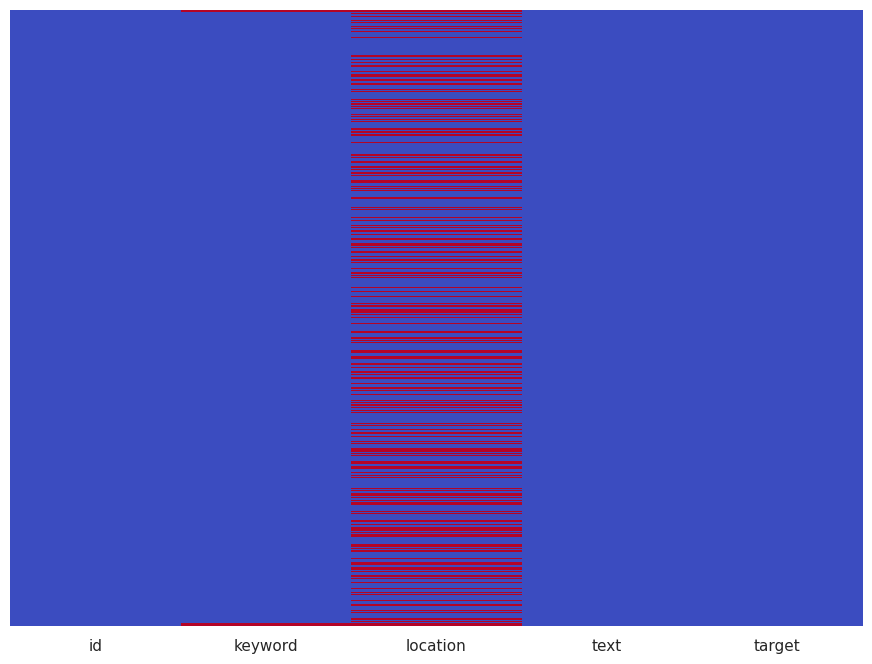

In [ ]:
# 결측치 확인

sns.set(rc={'figure.figsize':(11,8)})
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap="coolwarm")

2) 결측치 비율

* train set와 test set 모두에서 keyword의 0.8%, location은 33% 누락



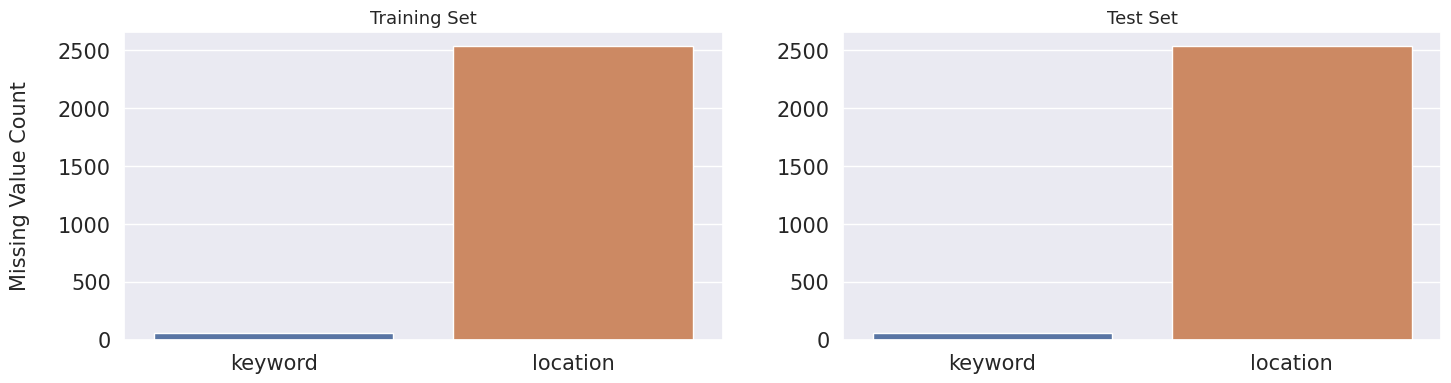

In [ ]:
# 누락된 데이터를 확인할 열 이름을 리스트 지정(keyword, location)
missing_cols = ['keyword', 'location']

# 2개의 열로 구성된 subplot 그래프 생성
fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)

# train 데이터셋에서 누락된 데이터 개수 시각화
sns.barplot(x=train_df[missing_cols].isnull().sum().index, y=train_df[missing_cols].isnull().sum().values, ax=axes[0])
# test 데이터셋에서 누락된 데이터 개수 시각화
sns.barplot(x=train_df[missing_cols].isnull().sum().index, y=train_df[missing_cols].isnull().sum().values, ax=axes[1])

# subplot의 y축에 레이블 추가
axes[0].set_ylabel('Missing Value Count', size=15, labelpad=20)

# subplot의 x축과 y축의 눈금 레이블 크기 설정
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Training Set', fontsize=13)
axes[1].set_title('Test Set', fontsize=13)

plt.show()

3) target의 비중
* Non Disaster: 파란색
* Disaster: 빨간색

Text(0.5, 1.0, 'Target Distributions \n (0: Non Disaster | 1: Disaster)')

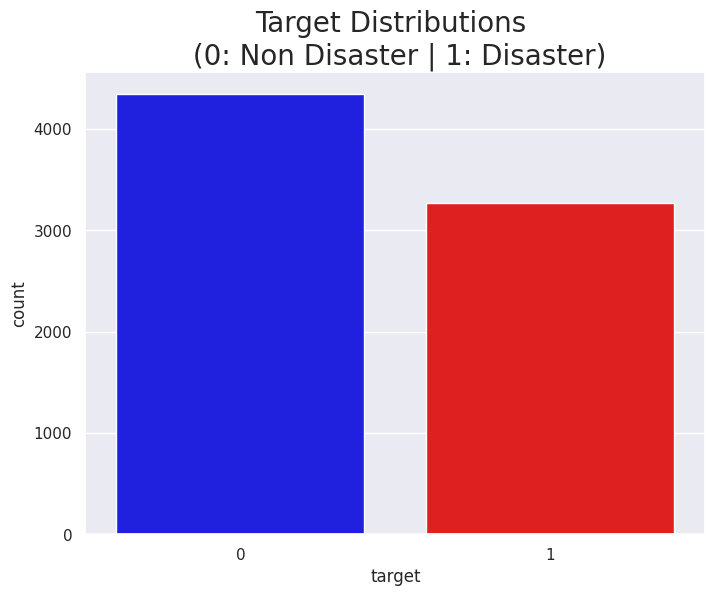

In [ ]:
# 새로운 그래프를 생성하기 위한 Figure 객체 생성
plt.figure(figsize=(8,6))
colors = ["blue", "red"]

# target열의 값에 따른 빈도를 시각화
sns.countplot(x = 'target', data=train_df, palette=colors)
plt.title('Target Distributions \n (0: Non Disaster | 1: Disaster)', fontsize=20)

4) 빈번하게 나온 키워드 상위 20개
* 키워드의 빈도를 시각적으로 확인할 수 있으며 어떤 키워드가 자주 등장하는 지 확인 가

Text(0.5, 0, 'Count of Keywords')

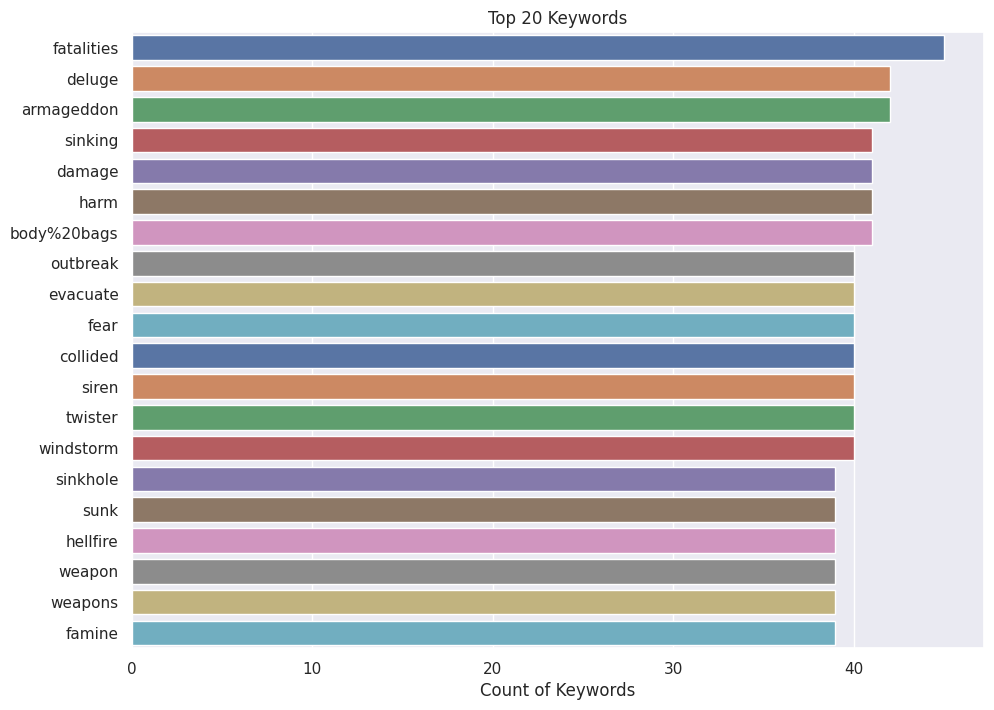

In [ ]:
# keyword 열의 값들을 카운트하고, 가장 빈도가 높은 상위 20개 키워드를 chains에 저장
chains=train_df['keyword'].value_counts()[:20] # value_counts(): 각 값의 빈도 계산

sns.barplot(x=chains,y=chains.index,palette='deep')

plt.title("Top 20 Keywords")
plt.xlabel("Count of Keywords")

5) disaster tweet과 non-disaster tweets 키워드 상위 20개

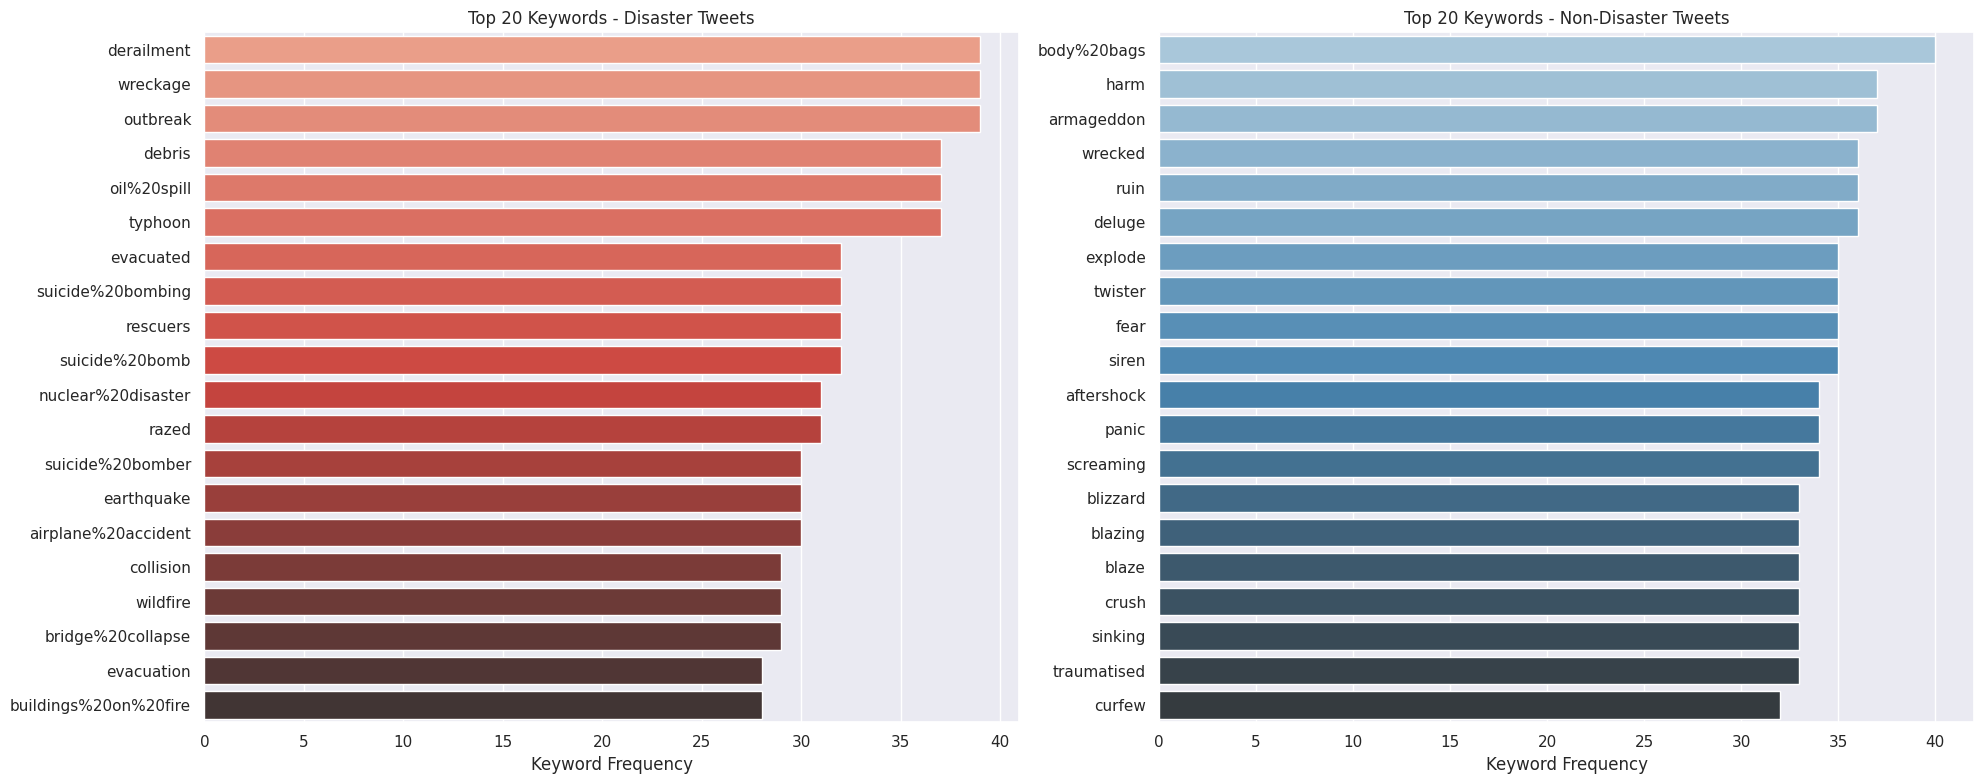

In [ ]:
# target 열 값이 1인 행들에서 keyword 열 값을 카운트 하여 disaster_keywords에 저장
disaster_keywords = train_df.loc[train_df["target"] == 1]["keyword"].value_counts()
# target 열 값이 0인 행들에서 keyword 열 값을 카운트 하여 nondisaster_keywords에 저장
nondisaster_keywords = train_df.loc[train_df["target"] == 0]["keyword"].value_counts()

fig, ax = plt.subplots(1,2, figsize=(20,8))
sns.barplot(y=disaster_keywords[0:20].index, x=disaster_keywords[0:20], orient='h', ax=ax[0], palette="Reds_d")
ax[0].set_title("Top 20 Keywords - Disaster Tweets")
ax[0].set_xlabel("Keyword Frequency")

sns.barplot(y=nondisaster_keywords[0:20].index, x=nondisaster_keywords[0:20], orient='h', ax=ax[1], palette="Blues_d")
ax[1].set_title("Top 20 Keywords - Non-Disaster Tweets")
ax[1].set_xlabel("Keyword Frequency")

plt.tight_layout()
plt.show()

6) 키워드에서 target의 분포
* target 값을 기준으로 색상을 구분해 특정 키워드의 재해와 비재해 트윗의 분포를 시각화함

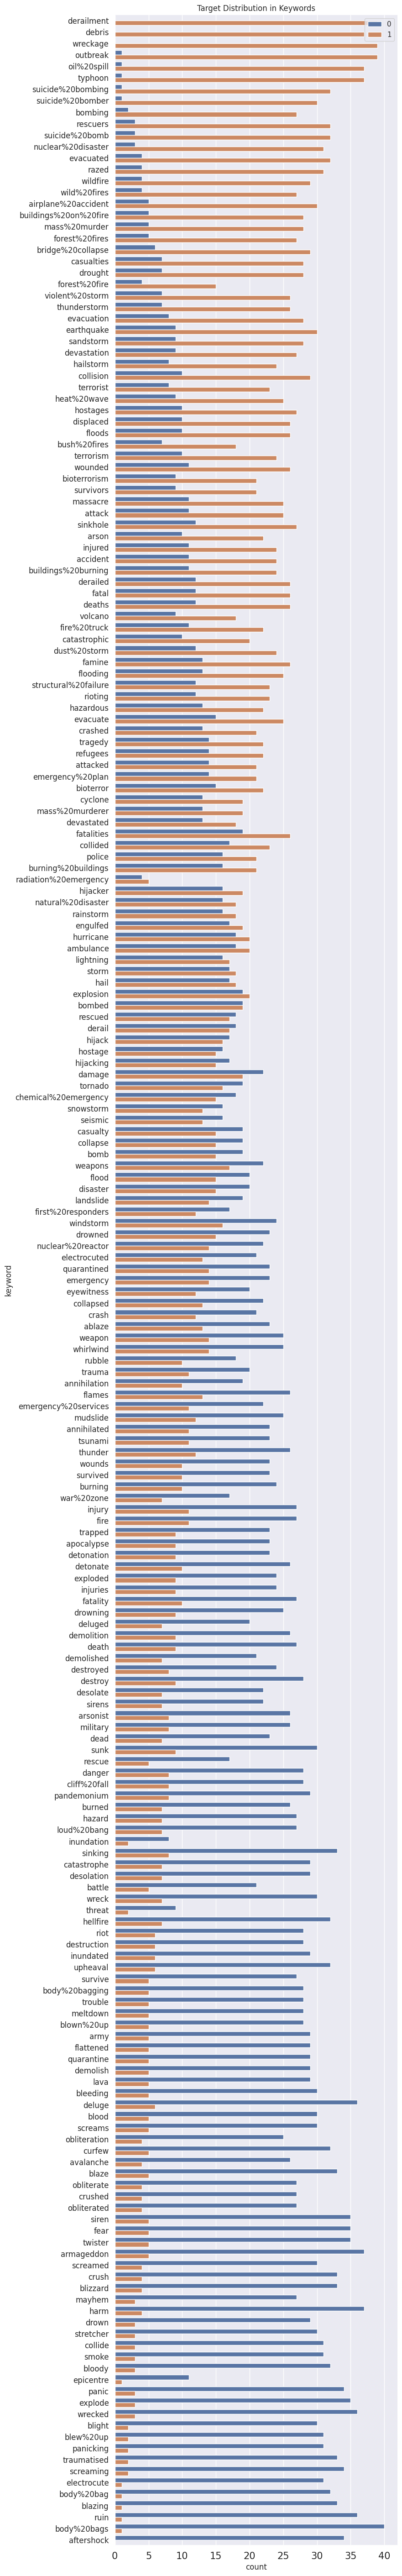

In [ ]:
# keyword 열을 기준으로 그룹화한 후 그룹별 target 열의 평균을 계산해 target_mean에 저장
train_df['target_mean'] = train_df.groupby('keyword')['target'].transform('mean') # transform(): 그룹별 평균 값을 원본 데이터프레임의 인덱스에 매핑

fig = plt.figure(figsize=(8, 72), dpi=100)

# 정렬된 target_mean을 기준으로 키워드를 y축에 표시한 후 재해/비재해 트윗 분포를 시각화
# 재해 트윗과 비재해 트윗은 다른 색상으로 구분됨
sns.countplot(y=train_df.sort_values(by='target_mean', ascending=False)['keyword'],
              hue=train_df.sort_values(by='target_mean', ascending=False)['target']) # hue: target 열 값 지정

plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=12)
plt.legend(loc=1)
plt.title('Target Distribution in Keywords')

plt.show()

train_df.drop(columns=['target_mean'], inplace=True)

7) 재난 트윗에서 많이 사용된 키워드와 재난이 아닌 트윗에서   가장 적게 사용된 키워드 표시
* 비슷한 키워드가 있는 지 비교 가능





<ipython-input-16-ba23dc3831cc>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_disaster_keyword = train_df.groupby('keyword').mean()['target'].sort_values(ascending = False).head(20)
<ipython-input-16-ba23dc3831cc>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_nondisaster_keyword = train_df.groupby('keyword').mean()['target'].sort_values().head(20)


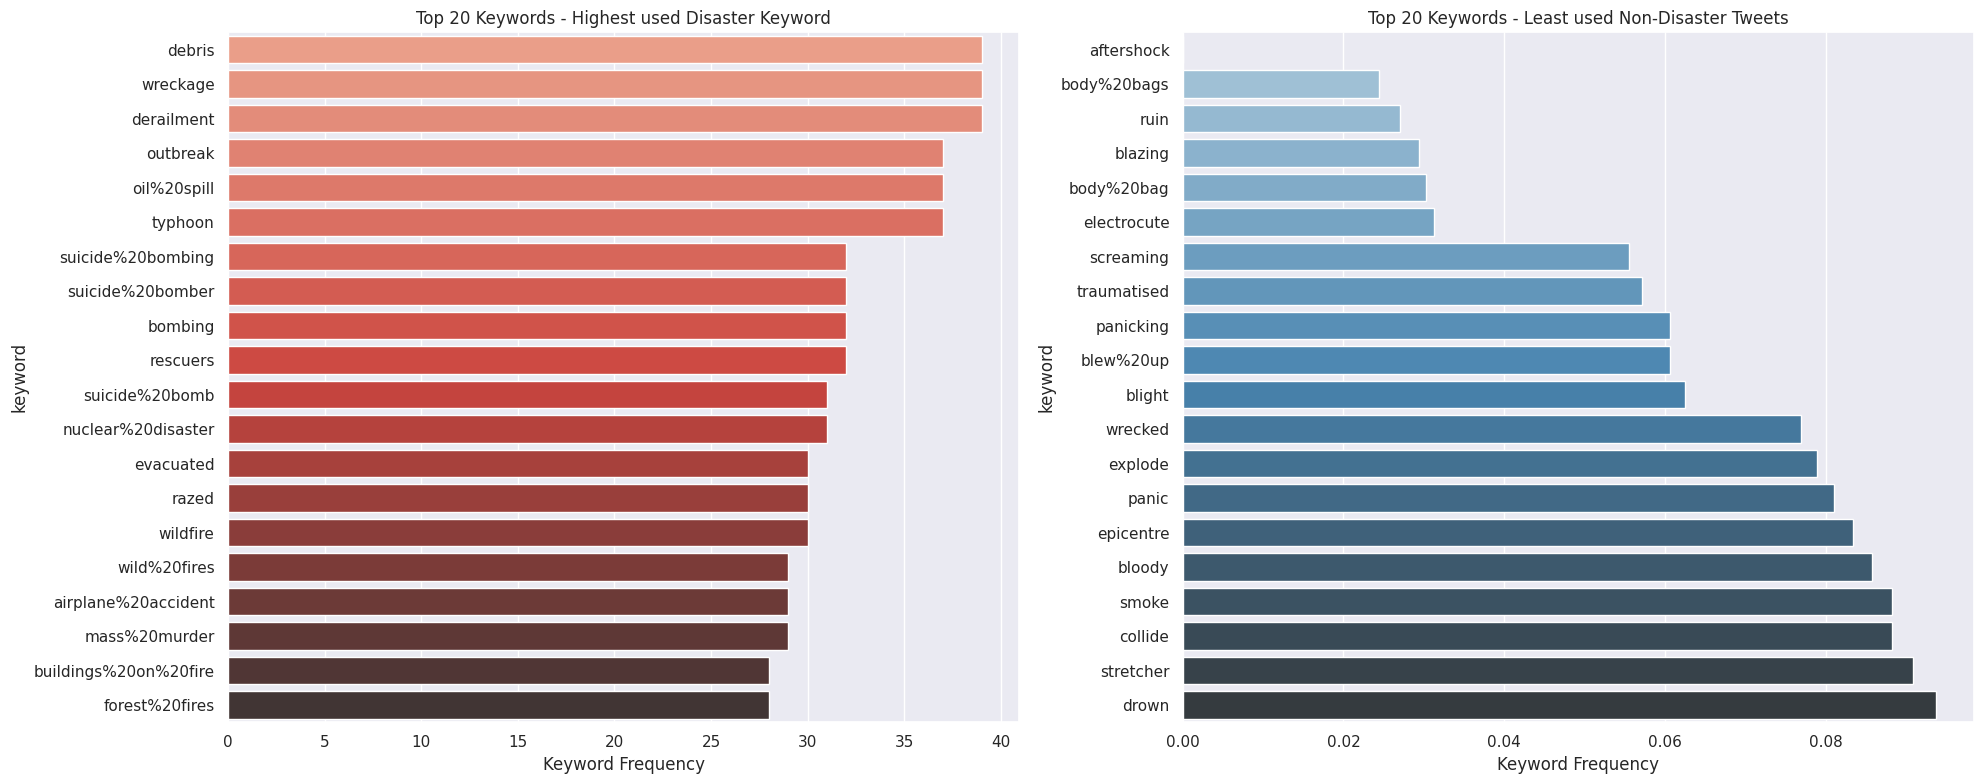

In [ ]:
# keyword 기준으로 그룹화한 후 그룹별 target 열의 평균을 계산
# 평균 값에 따라 내림차순으로 정렬하여 상위 20개의 재해 키워드 선택
top_disaster_keyword = train_df.groupby('keyword').mean()['target'].sort_values(ascending = False).head(20)
# 평균 값에 따라 내림차순으로 정렬하여 상위 20개의 비재해 키워드 선택
top_nondisaster_keyword = train_df.groupby('keyword').mean()['target'].sort_values().head(20)

fig, ax = plt.subplots(1,2, figsize=(20,8))

sns.barplot(y=top_disaster_keyword[0:20].index, x=disaster_keywords[0:20], orient='h', ax=ax[0], palette="Reds_d")
ax[0].set_title("Top 20 Keywords - Highest used Disaster Keyword")
ax[0].set_xlabel("Keyword Frequency")

sns.barplot(y=top_nondisaster_keyword[0:20].index, x=top_nondisaster_keyword[0:20], orient='h', ax=ax[1], palette="Blues_d")
ax[1].set_title("Top 20 Keywords - Least used Non-Disaster Tweets")
ax[1].set_xlabel("Keyword Frequency")

plt.tight_layout()
plt.show()

8) 가장 많이 나타난 장소 상위 20개 시각화

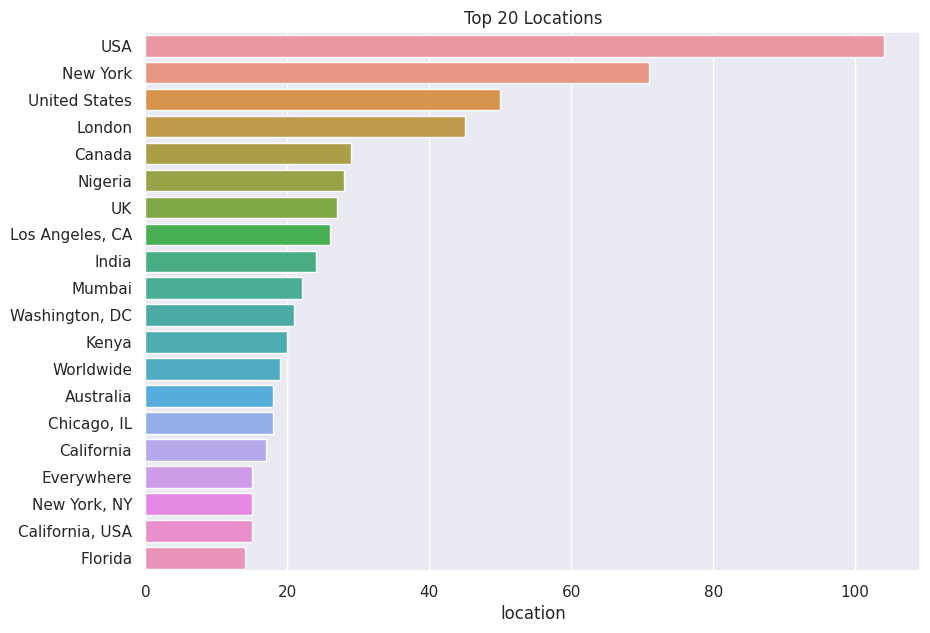

In [ ]:
# location 열에 있는 각 고유 위치의 빈도수를 계산
locations = train_df["location"].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(y=locations[0:20].index, x=locations[0:20], orient='h')

plt.title("Top 20 Locations")
plt.show()

# 전처리

3. 데이터 전처리

In [ ]:
train_df = pd.read_csv(
    '/content/drive/MyDrive/train.csv',
    usecols=['text', 'target'],
    dtype={'text': str, 'target': np.int64}
)
# train에서 사용할 열만 가져옴

1) Mislabeled Data
* train dataset에서 레이블이 잘못 지정된 행의 target 값을 전부 바꾸어 주는 과정 실행



In [ ]:
indices = [4415, 4400, 4399,4403,4397,4396, 4394,4414, 4393,4392,4404,4407,4420,4412,4408,4391,4405]
# 행번호 배열을 만들어줌

In [ ]:
# 특정 행의 target값을 올바른 값으로 수
train_df.loc[indices, 'target'] = 0 # train_df.loc: df에서 indices에 포함된 행을 선택해 반환

indices = [6840,6834,6837,6841,6816,6828,6831]
train_df.loc[indices]

train_df.loc[indices, 'target'] = 0

indices = [3913,3914,3936,3921,3941,3937,3938,3136,3133,3930,3933,3924,3917]
train_df.loc[indices]

train_df.loc[indices, 'target'] = 1

indices = [246,270,266,259,253,251,250,271]
train_df.loc[indices]

train_df.loc[indices, 'target'] = 0

indices = [6119,6122,6123,6131,6160,6166,6167,6172,6212,6221,6230,6091,6108]
train_df.loc[indices]

train_df.loc[indices, 'target'] = 0

indices = [7435,7460,7464,7466,7469,7475,7489,7495,7500,7525,7552,7572,7591,7599]
train_df.loc[indices]

train_df.loc[indices, 'target'] = 0

2) Removing Functions
* 텍스트를 처리하기 위해 정제함수 사용



In [ ]:
train_df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
def cleaned(text):
    text = re.sub(r"\n","",text)                # 개행 문자(\n)찾아 제거
    text = text.lower()                         # 소문자로 변환
    text = re.sub(r"\d","",text)                # 모든 숫자를 제거
    text = re.sub(r'[^\x00-\x7f]',r' ',text)    # ASCII 범위에 속하지 않은 모든 문자를 공백으로 대체
    text = re.sub(r'[^\w\s]','',text)           # 특수 문자 제거
    text = re.sub(r'http\S+|www.\S+', '', text) # URL 링크 제거
    text = re.sub(r'@\S+', '', text)            # '@'기호와 그 뒤에 연속된 비공백 문자 제거
    text = re.sub(r'#\S+', '', text)            # '#'기호와 그 뒤에 연속된 비공백 문자 제거
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # 영문 알파벳, 숫자, 공백을 제외한 모든 문자를 빈 문자열로 대체

    tokenizer = TweetTokenizer(preserve_case=True, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(text)
    tweet_tokens = [i for i in tweet_tokens if not i.isdigit()]
    tweets_clean = []
    for word in tweet_tokens:
      tweets_clean.append(word)

    return ' '.join(tweets_clean)

    #text = text.lower()
    #text = text.strip()
    #text = ' '.join([word for word in text.split() if word not in stopwords_list])
    #return text

In [ ]:
# df의 text열을 가공해 text_processed 열에 저장
train_df['text_processed'] = train_df['text'].apply(cleaned)
# target 열의 값을 sentiment 열에 복사해 새로운 열을 추가
train_df['sentiment'] = train_df['target']

3) 토큰화(Tokenizer)
* Tokenizer는 모든 고유 단어에 숫자 인덱스 할당
* 모델이 범주 값처럼 취급할 수 있도록 도와줌





In [ ]:
tokenizer = BertTokenizerFast.from_pretrained('distilbert-base-uncased')

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DistilBertTokenizer'. 
The class this function is called from is 'BertTokenizerFast'.


In [ ]:
sample_text = cleaned(train_df['text'][0])

tokens = tokenizer.tokenize(sample_text)    # tokenizer_tokenize(): 문장을 단어의 리스트로 반환
token_ids = tokenizer.convert_tokens_to_ids(tokens) # tokenizer.convert_tokens_to_ids(): 토큰들을 해당하는 숫자 ID로 변환

print(f'Sentence: {sample_text}')
print(f'Tokens: {tokens}')
print(f'Token IDs: {token_ids}')

Sentence: our deeds are the reason of this earthquake may allah forgive us all
Tokens: ['our', 'deeds', 'are', 'the', 'reason', 'of', 'this', 'earthquake', 'may', 'allah', 'forgive', 'us', 'all']
Token IDs: [2256, 15616, 2024, 1996, 3114, 1997, 2023, 8372, 2089, 16455, 9641, 2149, 2035]


*   [SEP]: 문장의 끝을 나타내는 마커로 BERT는 102를 사용
*   [CLS]: 각 문장의 시작 부분에 이 토큰을 추가해야 BERT가 분류 작업을 수행하며, BERT는 101을 사용
*   [PAD]: 패딩을 위한 특수 토큰으로 BERT는 숫자 0을 사용
*   [UNK]: BERT는 훈련 세트에 있던 토큰을 이해하고, 다른 모든 항목은 unknown 토큰을 사용하여 인코딩 가능





In [ ]:
encoding = tokenizer.encode_plus(
  sample_text,
  max_length=15,  # 인코딩 결과의 최대 길이 지정, 15를 넘어가는 토큰은 잘라냄
  truncation = True,  # 문장이 최대 길이를 초과할 경우 잘라냄
  add_special_tokens=True, # '[CLS]', '[PAD]', '[SEP]' 추가할 지 여부
  return_token_type_ids=False,  # 문장이 두 개의 문장으로 구성된 경우를 다룸, 여기서는 하나의 문장만 다루기에 False
  padding='max_length',   # 최대 길이에 맞추어 문장이 패딩됨
  return_attention_mask=True,  # attention_mask를 반환할 지 여부, attention_mask: 어떤 토큰이 관심을 받아야 하는 지 알려줌
  return_tensors='pt',  # 인코딩한 결과를 PyTorch 텐서로 반환하도록 지
)

print(len(encoding['input_ids'][0]))
encoding['input_ids'][0]

15


tensor([  101,  2256, 15616,  2024,  1996,  3114,  1997,  2023,  8372,  2089,
        16455,  9641,  2149,  2035,   102])

In [ ]:
print(len(encoding['attention_mask'][0]))
encoding['attention_mask']

15


tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

# 준비

4. 데이터 셋 준비

In [ ]:
max_len = 512

# IMDBDataset은 Dataset을 상속받아 필요한 메서드 구현
class IMDBDataset(Dataset):
  def __init__(self, texts, targets, tokenizer, max_len): # texts, targets, tokenizer, max_len 초기화
    self.texts = texts
    self.targets = targets
    self.tokenizer = tokenizer
    self.max_len = max_len

  def __len__(self): # 데이터셋의 총 샘플 수 반환
    return len(self.texts)

  def __getitem__(self, item): # 주어진 인덱스인 item에 해당하는 샘플을 반환
    text = str(self.texts[item])
    target = self.targets[item]

    encoding = self.tokenizer.encode_plus( # tokenizer.encode_plus() 함수를 사용해 문장 인코딩
      text,
      add_special_tokens=True,
      max_length=self.max_len,
      truncation = True,
      return_token_type_ids=False,
      padding='max_length',
      return_attention_mask=True,
      return_tensors='pt',
    )

    return {
      # 인코딩한 결과를 딕셔너리 형태로 반환
      'tweets_text': text,                                      # 원본 문장 저장
      'input_ids': encoding['input_ids'].flatten(),             # 인코딩 결과의 입력 토큰 ID 저장
      'attention_mask': encoding['attention_mask'].flatten(),   # 어탠션 마스크 저장
      'targets': torch.tensor(target, dtype=torch.long)         # 해당 문장의 레이블을 텐서 형태로 변환하여 저장
    }

In [ ]:
# train_test_split() 함수를 사용해 train_df를 train과 validation으로 나눔
X_train, X_valid, y_train, y_valid = train_test_split(train_df[['text_processed','text']], train_df['sentiment'],
                                                    stratify=train_df['sentiment'],
                                                    test_size=0.30, random_state = 0)
# pd.concat() 함수를 사용해 train과 text_processed, text 열과 sentiment 열을 합친 DataFrame인 df_train 생성
df_train = pd.concat([pd.DataFrame({'text': X_train['text_processed'].values,'text_old':X_train['text'].values}),pd.DataFrame({'sentiment': y_train.values})], axis = 1)
# validation을 validation과 test로 나눔
df_valid = pd.concat([pd.DataFrame({'text': X_valid['text_processed'].values,'text_old':X_valid['text'].values}),pd.DataFrame({'sentiment': y_valid.values})], axis = 1)

# validaion의 text와 text_old열, sentiment 열을 합친 DataFrame인 df_valid 생성
X_valid, X_test, y_valid, y_test = train_test_split(df_valid[['text','text_old']], df_valid['sentiment'],
                                                    stratify= df_valid['sentiment'],
                                                    test_size=0.5, random_state = 0)

df_valid = pd.concat([pd.DataFrame({'text': X_valid['text'].values,'text_old':X_valid['text_old'].values}),pd.DataFrame({'sentiment': y_valid.values})], axis = 1)
df_test = pd.concat([pd.DataFrame({'text': X_test['text'].values,'text_old':X_test['text_old'].values}),pd.DataFrame({'sentiment': y_test.values})], axis = 1)

print(df_train.shape, df_valid.shape, df_test.shape)

(5329, 3) (1142, 3) (1142, 3)


In [ ]:
# 데이터셋을 데이터로더로 변환하는 함수 정의
def create_data_loader(df, tokenizer, max_len, batch_size):
  ds = IMDBDataset(
    texts=df.text.to_numpy(),
    targets=df.sentiment.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len
  )

  return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=4     # 데이터로더에서 사용할 서브 프로세스 수, 데이터 로딩에 얼마나 많은 병렬화를 사용할 지 결정
    # 일반적으로 몇 개의 num_workers를 사용할 지는 실험을 통해 찾아내야 함
  )


batch_size = 16

train_data_loader = create_data_loader(df_train, tokenizer, max_len, batch_size)
valid_data_loader = create_data_loader(df_valid, tokenizer, max_len, batch_size)
test_data_loader = create_data_loader(df_test, tokenizer, max_len, batch_size)

In [ ]:
data = next(iter(train_data_loader))

print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['input_ids'].shape)

torch.Size([16, 512])
torch.Size([16, 512])
torch.Size([16, 512])


# DistilBert 학습

* DistilBert 설명

> BERT는 대규모 파라미터와 계산 비용이 많이 들기 때문에 작은 기기나 리소스 제약이 있는 환경에서 사용하는 것은 적합하지 않은데 이를 개선하기 위해 Distilbert는 BERT의 모델 구조를 간소화 하여 경량화되었다.

* BERT와 주요한 차이점
1. 모델 크기: Distilbert는 BERT보다 훨씬 작은 모델 크기를 가지고 있음. 이는 모델을 저장하고 전달하는 데 필요한 디스크 공간과 네트워크 대역폭을 줄일 수 있음.
2. 파라미터 수: Distilbertsms BERT보다 훨씬 적은 파라미터를 가지고 있음.
3. 사전학습 방식: BERT는 대규모 텍스트 데이터셋에서 사전학습된 후 fine-tuning을 통해 특정 자연어 처리 작업에 맞게 추가적인 학습을 수행하는 데 Distilbert 역시 유사한 방식으로 사전학습 수행 가능


5. 모델 학습


In [ ]:
model = DistilBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels = 2)
model = model.to(device)

You are using a model of type bert to instantiate a model of type distilbert. This is not supported for all configurations of models and can yield errors.


Some weights of the model checkpoint at bert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['bert.encoder.layer.11.attention.self.query.bias', 'bert.encoder.layer.4.attention.self.query.bias', 'bert.encoder.layer.1.attention.self.key.weight', 'bert.encoder.layer.10.attention.self.value.weight', 'bert.encoder.layer.9.output.dense.weight', 'bert.encoder.layer.7.attention.self.query.weight', 'bert.encoder.layer.4.attention.self.query.weight', 'bert.encoder.layer.0.intermediate.dense.weight', 'bert.encoder.layer.10.output.dense.bias', 'bert.embeddings.LayerNorm.bias', 'bert.encoder.layer.3.output.LayerNorm.weight', 'bert.encoder.layer.5.output.LayerNorm.bias', 'bert.encoder.layer.7.attention.self.key.bias', 'cls.predictions.transform.LayerNorm.weight', 'bert.pooler.dense.bias', 'bert.encoder.layer.2.attention.self.query.weight', 'bert.encoder.layer.0.intermediate.dense.bias', 'bert.encoder.layer.2.output.LayerNorm.bias', 'bert.encoder.layer.3.output.dens

In [ ]:
EPOCHS = 5 # 데이터셋을 몇 번 반복하여 학습할 지

# optimizer: 모델의 파라미터 업데이트
optimizer = AdamW(model.parameters(), lr = 5e-5) # model.parameters(): 학습할 모델의 파라미터 전달, Ir: 학습률
total_steps = len(train_data_loader) * EPOCHS # 총 학습 스텝 수

scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


+) train_epoch 함수

= 함수 내에서 모델을 학습 모드로 설정, 손실과 정확한 예측을 저장할 변수 초기화

= 데이터로더 반복하며 각 배치에 대해 작업 수행

* 배치의 입력 데이터(input_ids, attention)mask)와 targets을 GPU로 이동
* 모델에 입력 데이터를 전달해 손실과 예측 logits 얻음
* logits을 이용해 preds 계산, preds은 가장 높은 logits의 인덱스를 선택해 구함
* 정확한 예측의 수 계산, 손실 값 저장
* 손실에 대한 역전파 수행, 기울기 클리핑을 적용해 그래디언트 폭주 방지
* 옵티마이저를 사용해 모델의 파라미터 업데이트
* 스케줄러 호출해 학습률 조정
* 옵티마이저의 그래디언트 초기화

= 정확한 예측의 비율과 손실의 평균값 반환


In [ ]:
# 모델을 학습하는 함수 정의
def train_epoch(model, data_loader, optimizer, device, scheduler, n_examples):

  model.train()
  losses = []
  correct_predictions = 0

  for d in data_loader:
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)

    loss, logits = model(
      input_ids=input_ids,
      attention_mask=attention_mask,
      labels = targets,
      return_dict=False
    )

    logits = logits.detach().cpu().numpy()
    label_ids = targets.to('cpu').numpy()

    preds = np.argmax(logits, axis=1).flatten()   #returns indices of maximum logit
    targ = label_ids.flatten()

    correct_predictions += np.sum(preds == targ)

    losses.append(loss.item())
    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()

  return correct_predictions / n_examples, np.mean(losses)

+) eval_model 함수

= 함수 내에서 모델을 평가 모드로 설정, 손실과 정확한 예측을 저장할 변수 초기화

= torch.co_grad() 사용해 그라디언트 비활성화, 데이터로더 반복하여 각 배치에 대해 작업 수행

* 배치의 입력데이터와 targets을 GPU로 이동
* 모델에 입력 데이터를 전달해 손실과 예측 logits 얻음, 모델의 반환 값으로부터 logits은 detach하여 계산 그래프로부터 분리, CPU로 이동
* logits 이용해 preds 계산
* 정확한 예측의 수를 계산하고 손실 값 저장

= 정확한 예측의 비율과 손실의 평균값 반환

In [ ]:
# 학습된 모델을 평가하는 함수
def eval_model(model, data_loader, device, n_examples):

  model.eval()
  losses = []
  correct_predictions = 0

  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)
      loss, logits = model(
        input_ids=input_ids,
        attention_mask=attention_mask,
        labels = targets,
        return_dict=False
      )

      logits = logits.detach().cpu().numpy()
      label_ids = targets.to('cpu').numpy()

      preds = np.argmax(logits, axis=1).flatten()
      targ = label_ids.flatten()

      correct_predictions += np.sum(preds == targ)
      losses.append(loss.item())

  return correct_predictions / n_examples, np.mean(losses)

In [ ]:
# 모델의 학습과 검증을 반복하며 각 epoch의 손실과 정확도 기록
# 가장 좋은 성능을 보이는 모델을 저장
history = defaultdict(list)

best_acc = 0

for epoch in range(EPOCHS):

  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)

  train_acc, train_loss = train_epoch(model, train_data_loader, optimizer, device, scheduler, len(df_train))

  print(f'Train loss {train_loss} Accuracy {train_acc}')

  val_acc, val_loss = eval_model(model, valid_data_loader, device, len(df_valid))

  print(f'Val   loss {val_loss} Accuracy {val_acc}')
  print()

  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)

  if val_acc > best_acc:
    torch.save(model.state_dict(), 'best_model_state_a5.bin')
    best_acc = val_acc

Epoch 1/5
----------
Train loss 0.6031889535352856 Accuracy 0.6899981234753237
Val   loss 0.466815913716952 Accuracy 0.7802101576182137

Epoch 2/5
----------
Train loss 0.4088147556978072 Accuracy 0.840495402514543
Val   loss 0.4570618121781283 Accuracy 0.7933450087565674

Epoch 3/5
----------
Train loss 0.2996566986140912 Accuracy 0.8949146181272284
Val   loss 0.6734404971616136 Accuracy 0.7714535901926445

Epoch 4/5
----------
Train loss 0.23652997894022992 Accuracy 0.9294426721711391
Val   loss 0.6888794896141108 Accuracy 0.7924693520140105

Epoch 5/5
----------
Train loss 0.19180818394378585 Accuracy 0.9467066991930944
Val   loss 0.7354449329949502 Accuracy 0.7933450087565674



In [ ]:
test_acc, _ = eval_model(model, test_data_loader, device,len(df_test))
test_acc.item()

0.7758318739054291

-> DistillBert 모델을 통해 데이터셋을 분석해본 결과, 성능이 77.5%까지 나온다는 것을 확인해볼 수 있다.

# ELECTRA Bert 학습

* ELECTRA Bert 설명
> BERT와 같이 자연어 처리 작업을 위한 사전학습 언어 모델이다. ELECTRA는 생성자-감별자 훈련을 사용하는데 전체 문장을 통해 모델을 학습하는 BERT와 달리, 일부 단어만을 사용하여 모델을 훈련하는 효율적인 방법이다.

* ELECTRA Bert의 장점
1. 효율적인 훈련: ELECTRA는 생성자-감별자 훈련을 통해 BERT보다 더 효율적으로 학습할 수 있음.
2. 작은 모델 크기: ELECTRA는 BERT보다 작은 모델 크기로도 높은 성능을 달성할 수 있음.
3. 표현 능력: 생성자와 감별자 사이 경쟁은 모델의 표현 능력을 향상시키고, 더 정확한 문맥 정보를 제공할 수 있음.

5. 모델 학습

In [ ]:
from transformers import ElectraForSequenceClassification, ElectraTokenizer

model_name = 'google/electra-base-discriminator'  # ELECTRA base 모델
num_labels = 2  # 클래스 레이블 개수 (이진 분류의 경우 2)

tokenizer = ElectraTokenizer.from_pretrained(model_name)
model = ElectraForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)
model = model.to(device)

Some weights of the model checkpoint at google/electra-base-discriminator were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense.weight']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-base-discriminator and are newly initialized: ['classifier.o

In [ ]:
EPOCHS = 5

optimizer = AdamW(model.parameters(), lr = 5e-5)
total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
def train_epoch(model, data_loader, optimizer, device, scheduler, n_examples):

  model.train()
  losses = []
  correct_predictions = 0

  for d in data_loader:
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)

    optimizer.zero_grad()  # 학습 반복문 시작 부분에 추가해 매 반복마다 기울기 초기화

    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask,
      labels=targets
    )

    loss = outputs.loss        # outputs.loss: 손실가져옴
    logits = outputs.logits    # outputs.logits: 로짓 가져옴

    logits = logits.detach().cpu().numpy()
    label_ids = targets.to('cpu').numpy()

    preds = np.argmax(logits, axis=1).flatten()
    targ = label_ids.flatten()

    correct_predictions += np.sum(preds == targ)

    losses.append(loss.item())
    loss.backward()
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()

  return correct_predictions / n_examples, np.mean(losses)

In [ ]:
def eval_model(model, data_loader, device, n_examples):

  model.eval()
  losses = []
  correct_predictions = 0

  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)
      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask,
        labels=targets
      )

      loss = outputs.loss
      logits = outputs.logits

      logits = logits.detach().cpu().numpy()
      label_ids = targets.to('cpu').numpy()

      preds = np.argmax(logits, axis=1).flatten()
      targ = label_ids.flatten()

      correct_predictions += np.sum(preds == targ)
      losses.append(loss.item())

  return correct_predictions / n_examples, np.mean(losses)

In [ ]:
history = defaultdict(list)

best_acc = 0

for epoch in range(EPOCHS):

  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)

  train_acc, train_loss = train_epoch(model, train_data_loader, optimizer, device, scheduler, len(df_train))

  print(f'Train loss {train_loss} Accuracy {train_acc}')

  val_acc, val_loss = eval_model(model, valid_data_loader, device, len(df_valid))

  print(f'Val   loss {val_loss} Accuracy {val_acc}')
  print()

  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)

  if val_acc > best_acc:
    torch.save(model.state_dict(), 'best_model_state_electra.bin')
    best_acc = val_acc

Epoch 1/5
----------
Train loss 0.4412297078681563 Accuracy 0.825670857571777
Val   loss 0.45750820357352495 Accuracy 0.7819614711033275

Epoch 2/5
----------
Train loss 0.37170034369264177 Accuracy 0.863013698630137
Val   loss 0.4924861878777544 Accuracy 0.8143607705779334

Epoch 3/5
----------
Train loss 0.28518675543189403 Accuracy 0.9044848939763558
Val   loss 0.49214230852925944 Accuracy 0.8327495621716288

Epoch 4/5
----------
Train loss 0.23027683045815475 Accuracy 0.9313191968474386
Val   loss 0.5845632422456725 Accuracy 0.8371278458844134

Epoch 5/5
----------
Train loss 0.1831657130739646 Accuracy 0.9472696565959843
Val   loss 0.6201956282214572 Accuracy 0.8345008756567426



In [ ]:
test_acc, _ = eval_model(model, test_data_loader, device,len(df_test))
test_acc.item()

0.8248686514886164

-> ELECTRA Bert 모델을 통해 데이터셋을 분석해본 결과, 성능이 82.4%까지 나온다는 것을 확인해볼 수 있다.

# XLNet 학습

* XLNet 설명
> Transformer 모델 아키텍처를 기반으로 사용하는 모델로 BERT와 달리 XLNet은 문장 내 단어의 순서에 대한 제약을 없애고 모든 가능한 순열을 고려하여 모델을 학습한다.

* XLNet의 특징
1. Permutation Language Modeling: BERT와 달리 순서에 대한 제약을 없앤 사전학습 방법을 사용. 이를 통해 모든 가능한 순열을 고려해 문맥 정보를 학습하고 있어 문장 내 단어 간의 의존성을 더 잘 파악할 수 있음.
2. 양방향 문맥 모델링: Transformer의 양방향 문맥 모델링 아키텍처를 사용. 이는 문장 내의 모든 단어에 대해 전방향과 역방향 문맥을 동시에 고려하여 효과적인 문맥 파악이 가능하도록 함.
3. 상대적 위치 임베딩: 상대적 위치 임베딩 기법을 도입하여 단어간의 상대적인 위치 정보를 반영. 이는 문장 내 단어의 순서에 따른 의미 변화를 더 잘 이해할 수 있게 도와줌.
4. 불확실성 모델링: 불확실성 모델링을 통해 각 단어의 마스킹 확률을 예측하면서 모델 학습, 이는 모델이 가능한 모든 순열에 대한 예측을 고려하며, 문맥 정보를 최대한 활용할 수 있게 도와줌.


5. 모델 학습

In [ ]:
from transformers import XLNetForSequenceClassification

model = XLNetForSequenceClassification.from_pretrained('xlnet-base-cased', num_labels=2)
model = model.to(device)

Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.bias', 'lm_loss.weight']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['sequence_summary.summary.bias', 'logits_proj.bias', 'sequence_summary.summary.weight', 'logits_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions a

In [ ]:
EPOCHS = 5 # 데이터셋을 몇 번 반복하여 학습할 지

# optimizer: 모델의 파라미터 업데이트
optimizer = AdamW(model.parameters(), lr = 5e-5) # model.parameters(): 학습할 모델의 파라미터 전달, Ir: 학습률
total_steps = len(train_data_loader) * EPOCHS # 총 학습 스텝 수

scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
def train_epoch(model, data_loader, optimizer, device, scheduler, n_examples):

  model.train()
  losses = []
  correct_predictions = 0

  for d in data_loader:
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)

    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask,
      labels=targets
    )

    logits = outputs.logits.detach().cpu().numpy() # XLNet 모델의 출력 logits 가져옴
    label_ids = targets.to('cpu').numpy()

    preds = np.argmax(logits, axis=1).flatten()
    targ = label_ids.flatten()

    correct_predictions += np.sum(preds == targ)

    loss = outputs.loss  # outputs.loss 사용해 loss 값 가져옴
    losses.append(loss.item())
    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()

  return correct_predictions / n_examples, np.mean(losses)

In [ ]:
def eval_model(model, data_loader, device, n_examples):

  model.eval()
  losses = []
  correct_predictions = 0

  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)
      outputs = model(                   # XLNet 모델의 출력 가져
        input_ids=input_ids,
        attention_mask=attention_mask,
        labels=targets
      )

      logits = outputs.logits.detach().cpu().numpy()   # XLNet 모델의 출력 logits 가져옴
      label_ids = targets.to('cpu').numpy()

      preds = np.argmax(logits, axis=1).flatten()
      targ = label_ids.flatten()

      correct_predictions += np.sum(preds == targ)
      loss = outputs.loss        # outputs.loss 사용해 loss 값 가져옴
      losses.append(loss.item())

  return correct_predictions / n_examples, np.mean(losses)

In [ ]:
history = defaultdict(list)

best_acc = 0

for epoch in range(EPOCHS):

  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)

  train_acc, train_loss = train_epoch(model, train_data_loader, optimizer, device, scheduler, len(df_train))

  print(f'Train loss {train_loss} Accuracy {train_acc}')

  val_acc, val_loss = eval_model(model, valid_data_loader, device, len(df_valid))

  print(f'Val   loss {val_loss} Accuracy {val_acc}')
  print()

  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)

  if val_acc > best_acc:
    torch.save(model.state_dict(), 'best_model_state_xlnet.bin')
    best_acc = val_acc

Epoch 1/5
----------
Train loss 0.6903426786382755 Accuracy 0.5580784387314693
Val   loss 0.6612577881250117 Accuracy 0.6462346760070052

Epoch 2/5
----------
Train loss 0.5987657446882682 Accuracy 0.7029461437417902
Val   loss 0.5656544535110394 Accuracy 0.7241681260945709

Epoch 3/5
----------
Train loss 0.47534315662826604 Accuracy 0.7986489022330644
Val   loss 0.6411788931323422 Accuracy 0.7565674255691769

Epoch 4/5
----------
Train loss 0.38049697300452673 Accuracy 0.8588853443422781
Val   loss 0.6426618142674366 Accuracy 0.7644483362521891

Epoch 5/5
----------
Train loss 0.3210233212922683 Accuracy 0.8928504409832989
Val   loss 0.6585459780568877 Accuracy 0.7644483362521891



In [ ]:
test_acc, _ = eval_model(model, test_data_loader, device,len(df_test))
test_acc.item()

0.7486865148861647

-> XLNet 모델을 통해 데이터셋을 분석해본 결과, 성능이 74.8%까지 나온다는 것을 확인해볼 수 있다.

# 추론 결과

* 실행한 모델의 예측 결과를 비교해 가장 높은 확률 값을 가진 클래스를 선택하여 다음과 같은 추론을 실행할 수 있다.

1.   클래스 분류: 재난 트윗을 긍정, 부정, 중립으로 분류하여 어떤 모델이 가장 적합한 지 확인
2.   최상의 모델 식별: 주어진 모델 중 어떤 모델이 재난 트윗 분석에 가장 우수한 예측 성과를 보여주는 지 판단 가능



In [ ]:
# distilbert 모델의 예측 결과
distilbert_prediction = 0.775

# electra bert 모델의 예측 결과
electra_bert_prediction = 0.824

# xlnet 모델의 예측 결과
xlnet_prediction = 0.748

# 가장 높은 확률 값을 가진 클래스 선택
if distilbert_prediction > electra_bert_prediction and distilbert_prediction > xlnet_prediction:
    predicted_class = "긍정"
elif electra_bert_prediction > distilbert_prediction and electra_bert_prediction > xlnet_prediction:
    predicted_class = "부정"
else:
    predicted_class = "중립"

print("예측된 클래스:", predicted_class)

예측된 클래스: 부정


# 성능 평가


* DistilBert 모델의 성능은 77.5%으로 출력
* ELECTRA Bert 모델의 성능은 82.4%로 출력
* XLNet 모델의 성능은 74.8%로 출력

-> 다른 모델과 비교했을 때 상대적으로 ELECTRA Bert의 성능이 높다는 것을 확인했다.

-> Disaster Tweet Analysis 분석은 ELECTRA Bert 모델이 더 적합하다는 것을 알 수 있다.

-> 추론 결과를 바탕으로 Disasater Tweet Analysis는 긍정, 중립과 달리 부정의 결과 값이 높게 나타난다는 것을 확인할 수 있다.

